In [26]:
#import libraries
import pymongo
from pymongo import MongoClient 
import pandas as pd
import matplotlib as plt
import seaborn as sns
from pandas import DataFrame

In [19]:
#connect to the database
client = pymongo.MongoClient("mongodb://localhost:27017")

In [20]:
#Check available databases
print(client.list_database_names())

['DataTracker', 'ProgressTracker', 'WHO_DATA', 'admin', 'config', 'local']


In [30]:
mydb = client['WHO_DATA']

In [33]:
#Convert to daFRAME
df = DataFrame(list(mydb.Covid_Cases.find({})))
df.head()

,COUNTRY_NAME,Date_epicrv,ISO_CODE,NewCase,NewDeath,OBJECTID,TotalCase,TotalDeath,_id
0,Afghanistan,2020-02-24T00:00:00.000Z,AFG,1,0,1,1,0,5f36a761ffc3be3620a2edc9
1,Afghanistan,2020-02-25T00:00:00.000Z,AFG,0,0,2,1,0,5f36a762ffc3be3620a2edca
2,Afghanistan,2020-02-26T00:00:00.000Z,AFG,0,0,3,1,0,5f36a762ffc3be3620a2edcb
3,Afghanistan,2020-02-27T00:00:00.000Z,AFG,0,0,4,1,0,5f36a762ffc3be3620a2edcc
4,Afghanistan,2020-02-28T00:00:00.000Z,AFG,0,0,5,1,0,5f36a762ffc3be3620a2edcd


In [69]:
data = df.drop('_id', 1)

In [70]:
data.head()

,COUNTRY_NAME,Date_epicrv,ISO_CODE,NewCase,NewDeath,OBJECTID,TotalCase,TotalDeath
0,Afghanistan,2020-02-24T00:00:00.000Z,AFG,1,0,1,1,0
1,Afghanistan,2020-02-25T00:00:00.000Z,AFG,0,0,2,1,0
2,Afghanistan,2020-02-26T00:00:00.000Z,AFG,0,0,3,1,0
3,Afghanistan,2020-02-27T00:00:00.000Z,AFG,0,0,4,1,0
4,Afghanistan,2020-02-28T00:00:00.000Z,AFG,0,0,5,1,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 8 columns):
COUNTRY_NAME    10533 non-null object
Date_epicrv     10533 non-null object
ISO_CODE        10533 non-null object
NewCase         10533 non-null object
NewDeath        10533 non-null object
OBJECTID        10533 non-null object
TotalCase       10533 non-null object
TotalDeath      10533 non-null object
dtypes: object(8)
memory usage: 658.4+ KB


In [72]:
# convert just columns "a" and "b"
data[["NewCase", "NewDeath" ,"TotalCase"]] = data[["NewCase", "NewDeath","TotalCase"]].apply(pd.to_numeric)

In [73]:
df3 = data.head(250)

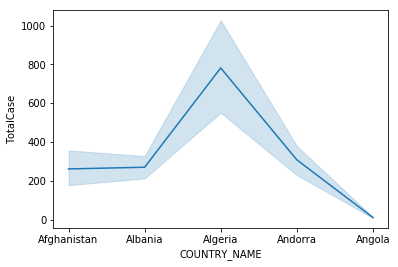

In [74]:
#creating simple line plot
ax = sns.lineplot(x='COUNTRY_NAME',y='TotalCase',data = df3)